###### Mushroom Classification

Abstract: From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible
	

Source:

Origin:

Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf

Donor:

Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)

Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


Data is taken from -  https://archive.ics.uci.edu/ml/datasets/Mushroom

Let us import libraries and import the dataset and then view the content of the data

we will apply 6 supervised machine learning classification models and an ANN model on the given dataset to classify mushrooms as poisonous or eatable.

    Logistic Regression
    Support Vector machines (SVC)
    K-Nearest Neighbours(K-NN)
    Naive Bayes classifier
    Decision Tree Classifier
    Random Forest Classifier
    Artificial Neural Networks

we proceed by converting categorical variables into dummy/indicator variables, then reducing dimensions using Princple Component Analysis to reduce 23 categorical variables (which will become 95 variables after conversion) to only 2 variables (Principle Components) and training different classification models over these two principle components. Finally, we visualize the outputs so that decision boundaries of different models can be seen in 2D-plane. Here the preference is not given to accuracy as the goal is to visualize the decision boundaries. For greater accuracy one can choose more than two variables.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
mushrooms = pd.read_csv(r'Mushrooms.csv.csv')

In [4]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


class column is response and reset columns are predictors

In [16]:
X = mushrooms.drop('class', axis=1) #predictors
y = mushrooms['class']


As we see dtypes of all columns are object, which means the data is competely categorical. we will have to convert that categorical data into numerical.

In [19]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
for col in X.columns:
    X[col] = Encoder.fit_transform(X[col])
y = Encoder.fit_transform(y)

In [20]:
X[0:3]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


In [21]:
y[0:3] #poisonous = 1 and eatable = 0

array([1, 0, 0])

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int32
 1   cap-surface               8124 non-null   int32
 2   cap-color                 8124 non-null   int32
 3   bruises                   8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-attachment           8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

Now Endoing is done. Another challenge here is that each column has multiple unique values. For ex: cap-shape has 1 to 5 values. We will have to divide that column into 5 columns only one holding the value corresponding to the attribute. 
We use get_dummies method

In [23]:
X = pd.get_dummies(X, columns = X.columns, drop_first = True)


#drop_first : bool, default False
    #Whether to get k-1 dummies out of k categorical levels by removing the
    #first level. Here we drop class column hence drp_first is True

In [24]:
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now split the dataset into training and testing datasets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5686, 95)
(2438, 95)
(5686,)
(2438,)


###### Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

importing metrics

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

##### Logistics Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

Accuracy score:  1.0
Confusion matrix:  [[1257    0]
 [   0 1181]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



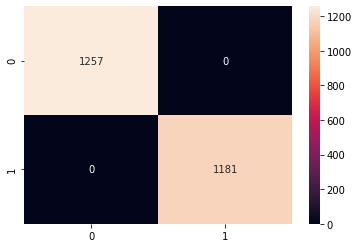

In [42]:
print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

##### Support vector Mechanics

Accuracy score:  0.9987694831829368
Confusion matrix:  [[1257    0]
 [   3 1178]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



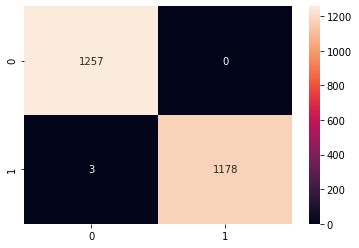

In [43]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

##### KNN

Accuracy score:  0.9995898277276456
Confusion matrix:  [[1257    0]
 [   1 1180]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



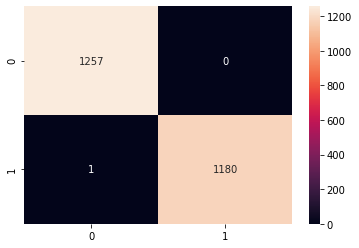

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

##### naive Bayes

Accuracy score:  0.9971287940935193
Confusion matrix:  [[1257    0]
 [   7 1174]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



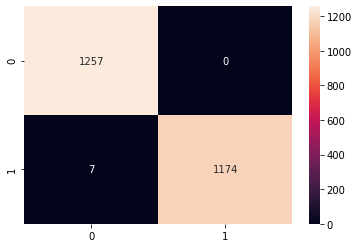

In [46]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

##### Decision Tree

Accuracy score:  1.0
Confusion matrix:  [[1257    0]
 [   0 1181]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



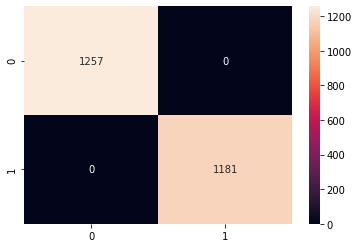

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

##### Random Forest

Accuracy score:  1.0
Confusion matrix:  [[1257    0]
 [   0 1181]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



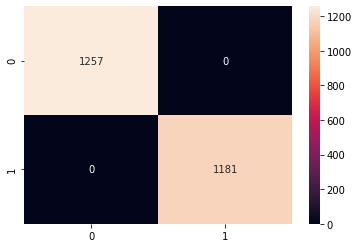

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

##### Artificial Neural networks

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Applying PCA with n_components = 2

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [69]:
model = Sequential()

Adding layers

In [70]:
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))
model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
model.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
5686/5686 [==============================] - 3s 604us/step - loss: 1.2511 - accuracy: 0.6356
Epoch 2/100
5686/5686 [==============================] - 2s 436us/step - loss: 0.2855 - accuracy: 0.7116
Epoch 3/100
5686/5686 [==============================] - 3s 443us/step - loss: 0.2932 - accuracy: 0.6731
Epoch 4/100
5686/5686 [==============================] - 2s 438us/step - loss: 0.2833 - accuracy: 0.6891
Epoch 5/100
5686/5686 [==============================] - 3s 489us/step - loss: 0.2748 - accuracy: 0.6873
Epoch 6/100
5686/5686 [==============================] - 3s 442us/step - loss: 0.2685 - accuracy: 0.6979
Epoch 7/100
5686/5686 [==============================] - 2s 437us/step - loss: 0.2783 - accuracy: 0.6769
Epoch 8/100
5686/5686 [==============================] - 3s 457us/step - loss: 0.2707 - accuracy: 0.6887
Epoch 9/100
5686/5686 [==============================] - 3s 497us/step - loss: 0.2680 - accuracy: 0.7059
Epoch 10/100
5686/5686 [==============================]

5686/5686 [==============================] - 3s 456us/step - loss: 0.2304 - accuracy: 0.7095
Epoch 79/100
5686/5686 [==============================] - 3s 444us/step - loss: 0.2279 - accuracy: 0.7093
Epoch 80/100
5686/5686 [==============================] - 2s 438us/step - loss: 0.2242 - accuracy: 0.7198
Epoch 81/100
5686/5686 [==============================] - 2s 435us/step - loss: 0.2311 - accuracy: 0.7154
Epoch 82/100
5686/5686 [==============================] - 3s 443us/step - loss: 0.2310 - accuracy: 0.7183
Epoch 83/100
5686/5686 [==============================] - 3s 441us/step - loss: 0.2231 - accuracy: 0.7096
Epoch 84/100
5686/5686 [==============================] - 2s 435us/step - loss: 0.2324 - accuracy: 0.7137
Epoch 85/100
5686/5686 [==============================] - 3s 470us/step - loss: 0.2243 - accuracy: 0.7327
Epoch 86/100
5686/5686 [==============================] - 3s 469us/step - loss: 0.2342 - accuracy: 0.7177
Epoch 87/100
5686/5686 [==============================] - 3

In [72]:
ypred = model.predict(X_test)
ypred = (ypred > 0.5)

Accuracy score:  0.9130434782608695
Confusion matrix:  [[1228   29]
 [ 183  998]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1257
           1       0.97      0.85      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438



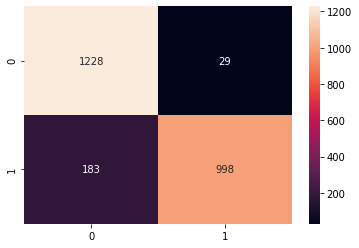

In [73]:
print("Accuracy score: ", accuracy_score(y_test, ypred))
print("Confusion matrix: ", confusion_matrix(y_test, ypred))
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='g')
print("Classification report: \n", classification_report(y_test, ypred))

Results:

For Logistic Regression:

Accuracy score:  1.0

Confusion matrix:  [[1257    0]
 [   0 1181]]
 
Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

===========================================================

For Support vector mehanics

Accuracy score:  0.9987694831829368

Confusion matrix:  [[1257    0]
 [   3 1178]]
 
Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

=======================================================

For KNN:

Accuracy score:  0.9995898277276456

Confusion matrix:  [[1257    0]
 [   1 1180]]
 
Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

=======================================================

For naive bayes:

Accuracy score:  0.9971287940935193

Confusion matrix:  [[1257    0]
 [   7 1174]]
 
Classification report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

========================================================

For Decision Tree:

Accuracy score:  1.0

Confusion matrix:  [[1257    0]
 [   0 1181]]
 
Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

========================================================

For Random Forest:

Accuracy score:  1.0

Confusion matrix:  [[1257    0]
 [   0 1181]]
 
Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

========================================================

ANN:

Accuracy score:  0.9130434782608695

Confusion matrix:  [[1228   29]
 [ 183  998]]
 
Classification report: 

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1257
           1       0.97      0.85      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


All the models have performed extremely well.